In [50]:
import numpy as np

def generate_circle(radius, num_points):
    theta = np.linspace(0, 2 * np.pi, num_points)
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)
    return np.array([x, y]).T

# Example: Generate data points for a circle
radius = 1
num_points = 100
circle_data = generate_circle(radius, num_points)

In [51]:
def generate_non_circle(num_points):
    x = np.random.uniform(-1, 1, num_points)
    y = np.random.uniform(-1, 1, num_points)
    return np.array([x, y]).T

# Example: Generate data points for a non-circle shape
non_circle_data = generate_non_circle(num_points)


In [52]:
def generate_distorted_circle(radius, num_points, distortion_level=0.1):
    theta = np.linspace(0, 2 * np.pi, num_points)

    # Introduce random distortion in radius
    distortions = np.random.uniform(1 - distortion_level, 1 + distortion_level, num_points)
    x = radius * distortions * np.cos(theta)
    y = radius * distortions * np.sin(theta)

    # Optionally, apply an affine transformation to stretch or rotate
    transform_matrix = np.array([[np.random.uniform(0.9, 1.1), np.random.uniform(-0.1, 0.1)],
                                 [np.random.uniform(-0.1, 0.1), np.random.uniform(0.9, 1.1)]])

    distorted_circle = np.dot(np.array([x, y]).T, transform_matrix)
    return distorted_circle

# Example: Generate a distorted circle
distorted_circle_data = generate_distorted_circle(radius, num_points)


In [53]:
# Generate multiple examples of circles and non-circles
num_samples = 1000
circle_samples = [generate_circle(radius, num_points) for _ in range(num_samples)]
non_circle_samples = [generate_non_circle(num_points) for _ in range(num_samples)]

# Labels: 1 for circle, 0 for non-circle
labels = np.array([1] * num_samples + [0] * num_samples)

# Combine the data
data = np.array(circle_samples + non_circle_samples)

# Shuffle the dataset
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [54]:
# Generate additional distorted circle samples
distorted_circle_samples = [generate_distorted_circle(radius, num_points) for _ in range(num_samples)]

# Combine all data
augmented_data = np.array(circle_samples + non_circle_samples + distorted_circle_samples)
augmented_labels = np.array([1] * num_samples + [0] * num_samples + [1] * num_samples)

# Shuffle the augmented dataset
indices = np.arange(augmented_data.shape[0])
np.random.shuffle(indices)
augmented_data = augmented_data[indices]
augmented_labels = augmented_labels[indices]


In [55]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
# Split the augmented dataset
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(augmented_data, augmented_labels, test_size=0.2, random_state=42)

# Define and compile the Bi-LSTM model
model = Sequential([
    Bidirectional(LSTM(64, return_sequences=True), input_shape=(num_points, 2)),
    Bidirectional(LSTM(64)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with the augmented dataset
history = model.fit(X_train_aug, y_train_aug, epochs=10, batch_size=32, validation_data=(X_test_aug, y_test_aug))


Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 186ms/step - accuracy: 0.8943 - loss: 0.2394 - val_accuracy: 1.0000 - val_loss: 1.3650e-04
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 173ms/step - accuracy: 1.0000 - loss: 1.0847e-04 - val_accuracy: 1.0000 - val_loss: 6.3504e-05
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 181ms/step - accuracy: 1.0000 - loss: 5.4320e-05 - val_accuracy: 1.0000 - val_loss: 3.6808e-05
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 175ms/step - accuracy: 1.0000 - loss: 3.2455e-05 - val_accuracy: 1.0000 - val_loss: 2.4159e-05
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 179ms/step - accuracy: 1.0000 - loss: 2.2142e-05 - val_accuracy: 1.0000 - val_loss: 1.7167e-05
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 179ms/step - accuracy: 1.0000 - loss: 1.5589e-05 - val_accuracy: 1.0000 - val_loss: 1.2917e-05
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 179ms/step - accuracy: 1.0000 - loss: 1.2024e-05 - val_accuracy: 1.0000 - val_loss: 1.0092e-05
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 177

In [56]:
loss, accuracy = model.evaluate(X_test_aug, y_test_aug)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

# Test on a new distorted circle
new_distorted_circle = generate_distorted_circle(radius, num_points)
new_distorted_circle = new_distorted_circle.reshape(1, num_points, 2)
prediction = model.predict(new_distorted_circle)

if prediction > 0.5:
    print("The sequence is recognized as a circle.")
else:
    print("The sequence is not recognized as a circle.")

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 1.0000 - loss: 5.5704e-06
Test Loss: 5.61583146918565e-06
Test Accuracy: 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step
The sequence is recognized as a circle.


In [57]:
distortion_levels = [0.1, 0.2, 0.3, 0.4, 0.5,0.5,0.7,1,5]
for distortion_level in distortion_levels:
    test_distorted_circle = generate_distorted_circle(radius, num_points, distortion_level)
    test_distorted_circle = test_distorted_circle.reshape(1, num_points, 2)
    prediction = model.predict(test_distorted_circle)

    print(f"Distortion Level: {distortion_level}, Prediction: {'Circle' if prediction > 0.5 else 'Non-Circle'}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Distortion Level: 0.1, Prediction: Circle
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Distortion Level: 0.2, Prediction: Circle
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Distortion Level: 0.3, Prediction: Circle
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Distortion Level: 0.4, Prediction: Circle
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Distortion Level: 0.5, Prediction: Circle
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Distortion Level: 0.5, Prediction: Circle
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Distortion Level: 0.7, Prediction: Circle
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Distortion Level: 1, Prediction: Circle
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Distortion Level: 5, Prediction: Non-Circle


#fitted circle

In [64]:
from scipy.optimize import least_squares

def fit_circle(x, y):
    # Initial guess for the circle parameters (center_x, center_y, radius)
    x_m = np.mean(x)
    y_m = np.mean(y)
    initial_guess = [x_m, y_m, np.std(x)]

    def calc_radius(xc, yc):
        return np.sqrt((x - xc)**2 + (y - yc)**2)

    def cost_function(params):
        xc, yc, r = params
        return calc_radius(xc, yc) - r

    # Optimize to find the best circle parameters
    result = least_squares(cost_function, initial_guess)
    xc, yc, r = result.x
    return xc, yc, r

# Example usage with distorted circle data
x, y = distorted_circle_data[:, 0], distorted_circle_data[:, 1]
xc, yc, radius = fit_circle(x, y)
print(f"Fitted circle center: ({xc}, {yc}), radius: {radius}")


Fitted circle center: (0.006455260802989471, -0.017109832593201573), radius: 1.0572130457122388


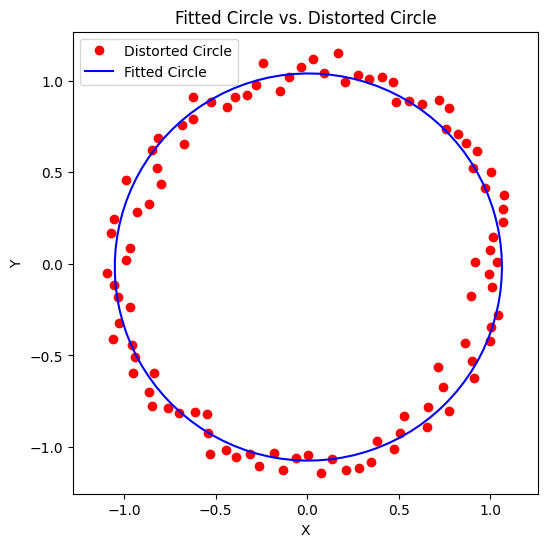

In [65]:
def generate_fitted_circle(xc, yc, radius, num_points=100):
    theta = np.linspace(0, 2 * np.pi, num_points)
    x_fit = xc + radius * np.cos(theta)
    y_fit = yc + radius * np.sin(theta)
    return np.array([x_fit, y_fit]).T

# Generate the circle points
fitted_circle = generate_fitted_circle(xc, yc, radius)

# Plot the original distorted points and the fitted circle
plt.figure(figsize=(6, 6))
plt.plot(x, y, 'ro', label='Distorted Circle')
plt.plot(fitted_circle[:, 0], fitted_circle[:, 1], 'b-', label='Fitted Circle')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Fitted Circle vs. Distorted Circle')
plt.axis('equal')
plt.show()
